<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/JARVIS_DFPT_High_throughput_Density_Functional_Perturbation_Theory_and_Machine_Learning_Predictions_of_Infrared%2C_Piezoelectric_and_Dielectric_Responses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jarvis-tools

     |████████████████████████████████| 962 kB 5.2 MB/s 
     |████████████████████████████████| 325 kB 49.3 MB/s 


In [2]:
from jarvis.db.figshare import data,get_jid_data
import pandas as pd
dft_3d=data('dft_3d')
df=pd.DataFrame(dft_3d)

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 31.9M/31.9M [00:02<00:00, 14.7MiB/s]


Loading the zipfile...
Loading completed.


In [3]:
df.columns

Index(['jid', 'spg_number', 'spg_symbol', 'formula',
       'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms',
       'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor',
       'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh',
       'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz',
       'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg',
       'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij',
       'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric',
       'dfpt_piezo_max_dielectric_electronic',
       'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode',
       'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond',
       'pcond', 'nkappa', 'pkappa', 'ehull', 'dimensionality', 'efg',
       'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys', 'density',
       'poisson', 'raw_files', 'nat', 'bulk_modulus_kv', 'shear_modulus_gv',
       'mbj_bandgap', 'hse_gap', 'reference'

In [28]:
pip install matplotlib-venn

<Figure size 432x288 with 0 Axes>

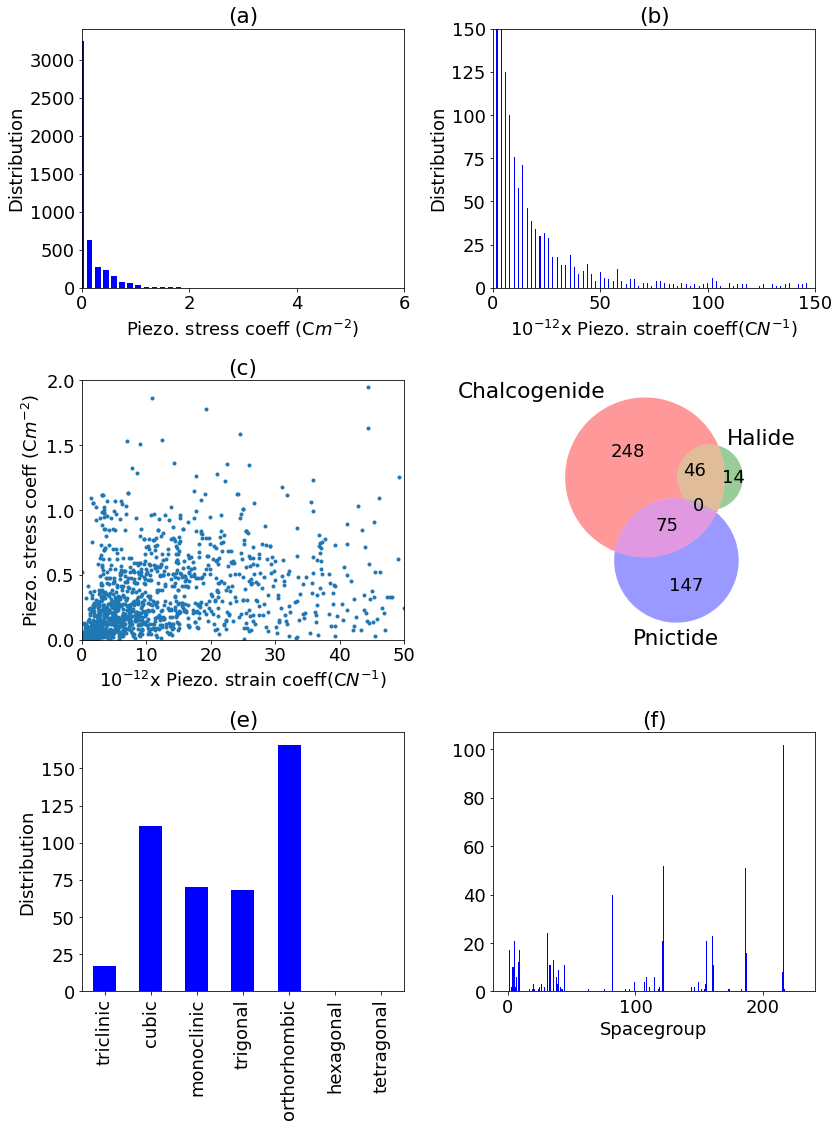

In [52]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from jarvis.core.composition import Composition
from matplotlib_venn import venn3, venn3_circles
the_grid = GridSpec(3, 2)
fig=plt.figure()


plt.figure(figsize=(12,16))
plt.rcParams.update({'font.size': 18})



plt.subplot(the_grid[0, 0])
val=np.array(df['dfpt_piezo_max_eij'].replace('na',np.nan).dropna().values,dtype='float')
hist, bins = np.histogram(val,bins=np.arange(0,6 , .15), density=False)
plt.bar(bins[:-1],hist,color='b',width=0.1)
plt.xlabel('Piezo. stress coeff (C$m^{-2}$)')
plt.ylabel('Distribution')
plt.xlim([0,6])
plt.title('(a)')

plt.subplot(the_grid[0, 1])
val=np.array(df['dfpt_piezo_max_dij'].replace('na',np.nan).dropna().values,dtype='float')
hist, bins = np.histogram(val,bins=np.arange(0,150 , 2), density=False)
plt.bar(bins[:-1],hist,color='b',width=0.5)
plt.xlabel('10$^{-12} $x Piezo. strain coeff(C$N^{-1}$)')
plt.ylabel('Distribution')
plt.xlim([0,150])
plt.ylim([0,150])
plt.title('(b)')

plt.subplot(the_grid[1, 0])
dff=df[['dfpt_piezo_max_dij','dfpt_piezo_max_eij']].replace('na',np.nan).dropna()
plt.plot(dff['dfpt_piezo_max_dij'],dff['dfpt_piezo_max_eij'],'.')
plt.xlabel('10$^{-12} $x Piezo. strain coeff(C$N^{-1}$)')
plt.ylabel('Piezo. stress coeff (C$m^{-2}$)')
plt.xlim([0,50])
plt.ylim([0,2])
plt.title('(c)')

plt.subplot(the_grid[1, 1])
plt.title('(d)')
chalcogen=[] #O,S,Se,Te,Po
halogen=[]#F,Cl,Br,I,At
pnictogen=[]#N,P,As,Sb,Bi
all_crys=['triclinic', 'cubic', 'monoclinic', 'trigonal', 'orthorhombic', 'hexagonal', 'tetragonal']
all_crys_info={}
for i,ii in enumerate(all_crys):
  all_crys_info[ii]=i

spg=[]
crys=[]
for i,ii in df.iterrows():
  if ii['dfpt_piezo_max_eij'] !='na' and ii['dfpt_piezo_max_eij']>=0.5:
    spg.append(int(ii['spg_number']))
    crys.append(all_crys_info[ii['crys']])
    comp=Composition.from_string(ii['formula']).to_dict()
    if set(['O','S','Se','Te','Po']).intersection(set(comp.keys())):
      chalcogen.append(ii['jid'])
    if set(["F","Cl","Br","I","At"]).intersection(set(comp.keys())):
      halogen.append(ii['jid'])
    if set(['N','P','As','Sb','Bi']).intersection(set(comp.keys())):
      pnictogen.append(ii['jid'])

plt.subplot(the_grid[1, 1],aspect=1)
venn3([set(chalcogen), set(halogen), set(pnictogen)], ('Chalcogenide', 'Halide', 'Pnictide'))


plt.subplot(the_grid[2, 0])
hist, bins = np.histogram(crys,bins=np.arange(0,6 , 1), density=False)
plt.bar(bins[:-1],hist,color='b',width=0.5)
plt.xticks(list(all_crys_info.values()),list(all_crys_info.keys()),rotation='vertical')
plt.ylabel('Distribution')
plt.xlim([-0.5,6.5])
plt.title('(e)')

plt.subplot(the_grid[2, 1])
hist, bins = np.histogram(spg,bins=np.arange(0,231 , 1), density=False)
plt.bar(bins[:-1],hist,color='b')
#plt.xticks(list(all_crys_info.values()),list(all_crys_info.keys()),rotation='vertical')
# plt.ylabel('Distribution')
# plt.xlim([-0.5,6.5])
plt.xlabel('Spacegroup')
plt.title('(f)')


plt.tight_layout()